<a href="https://colab.research.google.com/github/farahwadya/kmeans-clustering/blob/main/KMeans_Clustering_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KMeans Clustering (Core)
Task
Your task is to perform customer segmentation using KMeans. We are interested in grouping our customers into groups based on similar characteristics. This can help the company effectively allocate marketing resources. We will use customer age, education, years of employment, income, debt, whether they defaulted, and their debt-to-income ratio to group them into segments.

You can download the data here. The original data is from this data source.

Use KMeans to create various customer segments.
Use an Elbow Plot of inertia.
And a plot of Silhouette Scores.
Choose a K based on the results.
Analyze the clusters you made in Part 1.  
Create analytical visualizations that explore statistics for each feature for each cluster.
Write a description of each cluster based on the visualizations you created.
Do more than describe the numbers; try to see beyond the numbers and describe the people represented by each cluster.
Include at least one insight for each cluster.
Create one or two recommendations for your stakeholders (the credit card company) regarding how they should market credit cards differently or which cards they should market to each cluster based on your data and insights.
Submit your notebook below.

# packages

In [ ]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# dataset

In [ ]:
fpath='/content/drive/MyDrive/AXSOSACADEMY/05-IntermediateML/Week18/Data/cust_seg (1).csv'
df=pd.read_csv(fpath,index_col='Customer Id')
df.head()

,Unnamed: 0,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,,
1,0,41,2,6,19,0.124,1.073,0.0,6.3
2,1,47,1,26,100,4.582,8.218,0.0,12.8
3,2,33,2,10,57,6.111,5.802,1.0,20.9
4,3,29,2,4,19,0.681,0.516,0.0,6.3
5,4,47,1,31,253,9.308,8.908,0.0,7.2


# cleaning and scaling

In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
3,33,2,10,57,6.111,5.802,1.0,20.9
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 850 entries, 1 to 850
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        700 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 59.8 KB


In [ ]:
df.shape

(850, 8)

In [ ]:
mode = df['Defaulted'].mode()[0]
df['Defaulted'].fillna(mode, inplace=True)
df.isna().sum()

/tmp/ipython-input-1775927825.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Defaulted'].fillna(mode, inplace=True)


,0
Age,0
Edu,0
Years Employed,0
Income,0
Card Debt,0
Other Debt,0
Defaulted,0
DebtIncomeRatio,0


In [ ]:

X_scaled = StandardScaler().fit_transform(df)
X_scaled


array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

# Use KMeans to create various customer segments.
- Use an Elbow Plot of inertia.
- And a plot of Silhouette Scores.
- Choose a K based on the results.

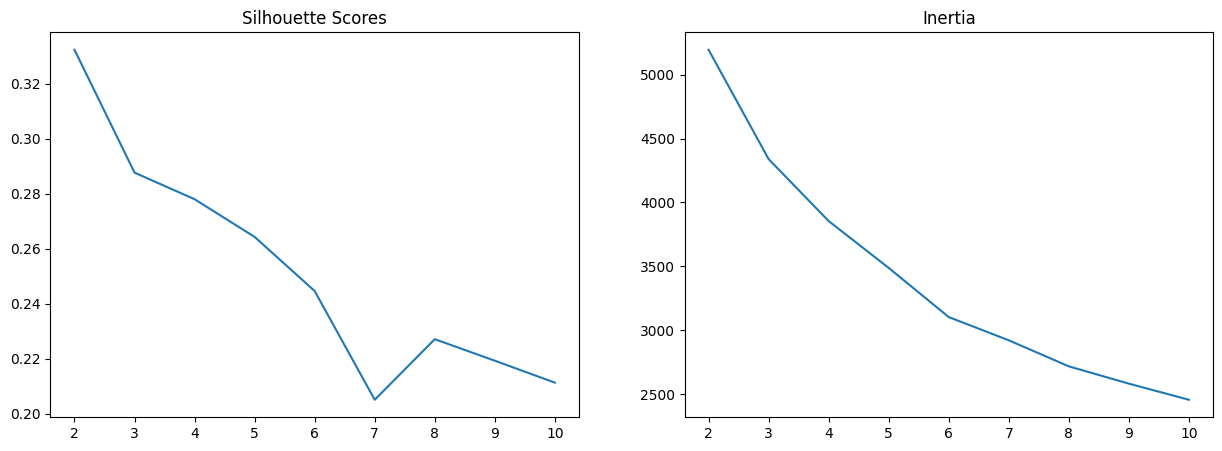

In [ ]:
# Iterate over a range of k clusters to find the optimal number of clusters
ks = range(2,11)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, n_init = 'auto', random_state=42)
  kmeans.fit(X_scaled)
  sils.append(silhouette_score(X_scaled, kmeans.labels_))
  inertias.append(kmeans.inertia_)
#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

In [ ]:
kmeans=KMeans(n_clusters=3,n_init='auto',random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [ ]:
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_ # add a new columns that call cluster to cluster the customer to which cluster he/belongs
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
Customer Id,,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3,0
2,47,1,26,100,4.582,8.218,0.0,12.8,2
3,33,2,10,57,6.111,5.802,1.0,20.9,1
4,29,2,4,19,0.681,0.516,0.0,6.3,0
5,47,1,31,253,9.308,8.908,0.0,7.2,2


In [ ]:
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,33.827458,1.604824,7.654917,36.181818,0.863681,1.822410,0.000000,7.993506
1,1,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.987952,13.994578
2,2,43.089655,1.931034,17.220690,102.724138,4.227897,8.018490,0.131034,13.891724


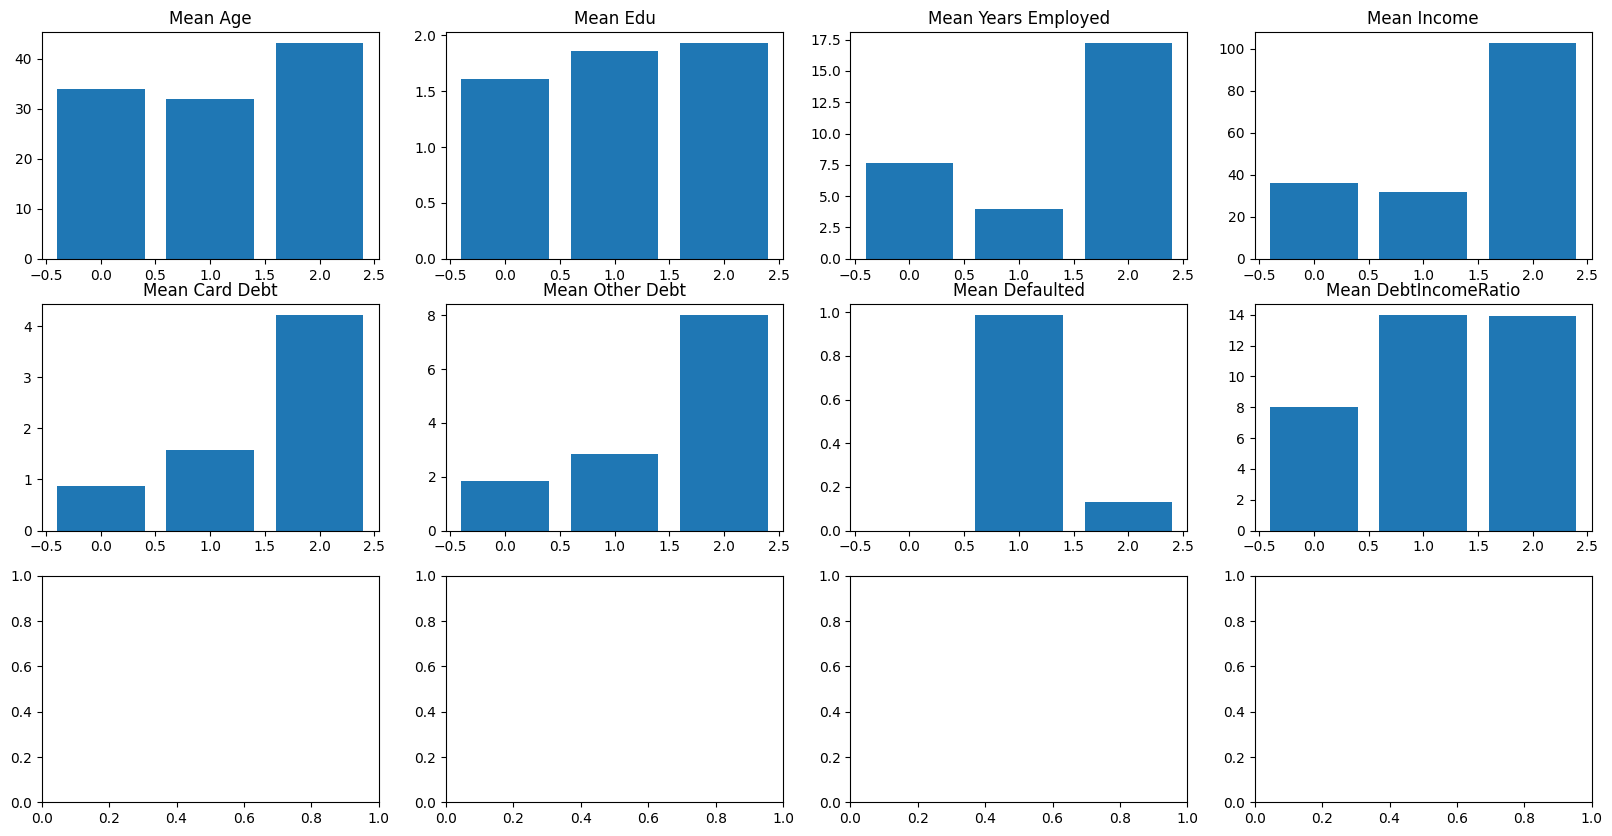

In [ ]:
# Visualize means
fig, axes = plt.subplots(3,4, figsize = (20, 10))
# fig is an array of dimensions 3,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

- cluster 0: Financially Stable Adults
  -  This cluster represents adult customers (around 35 years old) who are less educated compared to other clusters.
They are senior employees with approximately 7 years of experience, having middle-level income and the lowest debt among all clusters.
Almost none of them have defaulted (they pay off their debts on time), and they maintain the lowest debt-to-income ratio.

- cluster 1: Overcommitted Young Adults
  - This cluster consists of young individuals (around 30 years old) with a high education level (~2).
They are junior employees with about 3 years of work experience, earning the lowest income among all clusters.
They carry a medium level of debt, but show the highest default rate (they fail to pay off their debts), and have a high debt-to-income ratio — indicating young employees with multiple financial commitments.

- cluster 2: Wealthy Defaulters
  - This cluster includes middle-aged individuals with a high level of education and long work experience (around 17 years).
They earn a high income but also have the highest total debt.
Despite their financial capability, they tend to default more often, yet still maintain a high debt-to-income ratio.

In [ ]:
df.loc[df['cluster']==1].index


Index([  3,  11,  15,  23,  33,  37,  38,  41,  53,  55,
       ...
       795, 797, 803, 810, 814, 817, 824, 825, 831, 848],
      dtype='int64', name='Customer Id', length=166)

In [ ]:
kmeans2=KMeans(n_clusters=2,n_init='auto',random_state=42)
kmeans2.fit(X_scaled)

KMeans(n_clusters=2, random_state=42)

In [ ]:
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans2.labels_ # add a new columns that call cluster to cluster the customer to which cluster he/belongs
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
Customer Id,,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3,1
2,47,1,26,100,4.582,8.218,0.0,12.8,0
3,33,2,10,57,6.111,5.802,1.0,20.9,0
4,29,2,4,19,0.681,0.516,0.0,6.3,1
5,47,1,31,253,9.308,8.908,0.0,7.2,0


In [ ]:
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,42.108247,1.948454,15.793814,91.742268,3.874990,7.241469,0.242268,14.205155
1,1,32.935976,1.640244,6.428354,33.347561,0.897178,1.847732,0.207317,8.978811


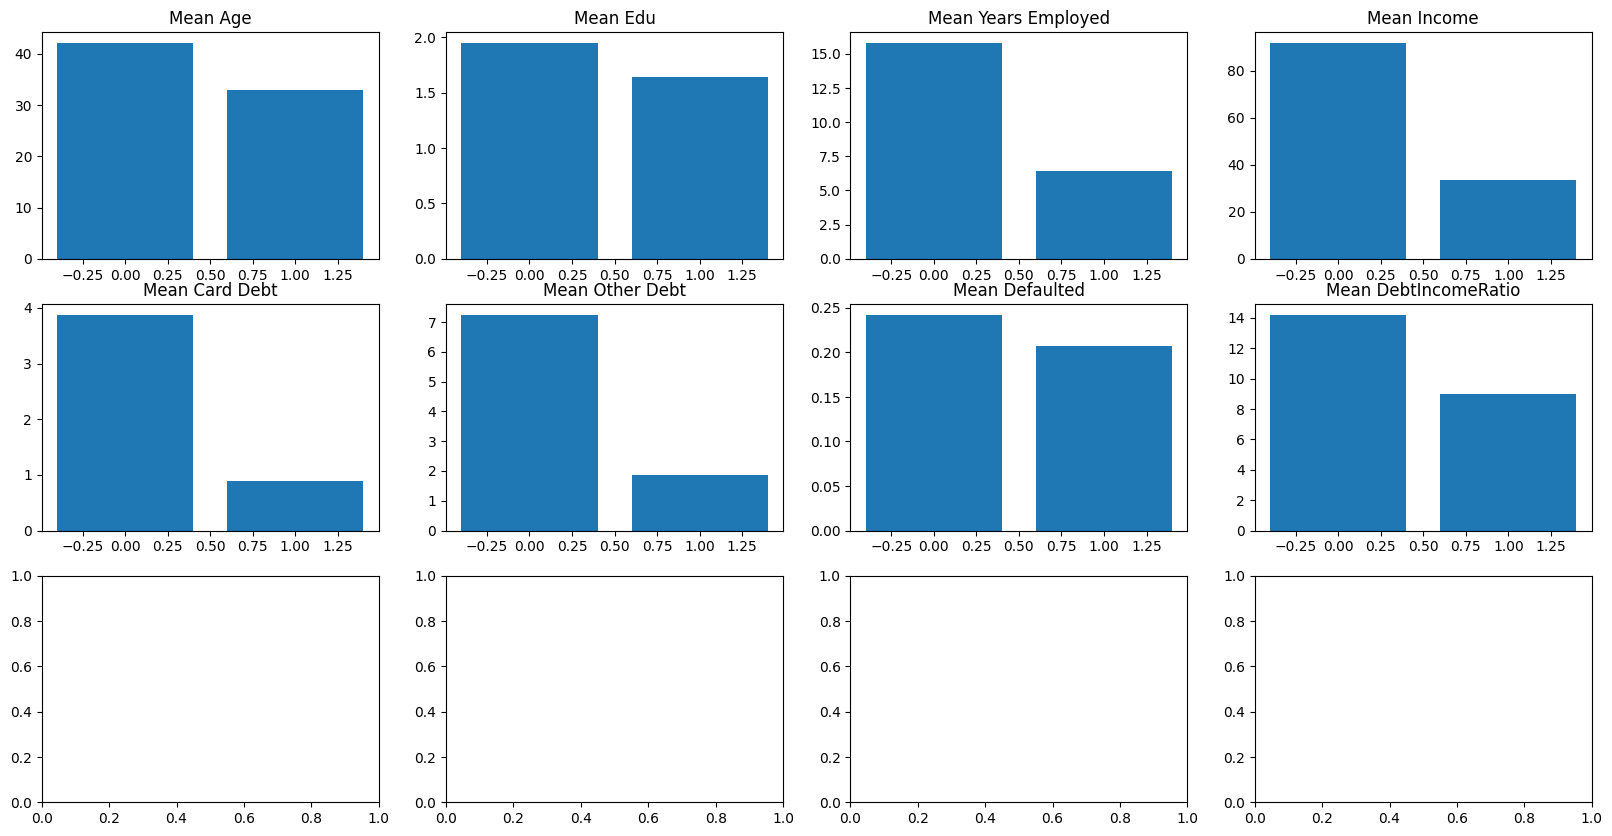

In [ ]:
# Visualize means
fig, axes = plt.subplots(3,4, figsize = (20, 10))
# fig is an array of dimensions 3,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

this nubmer of clusters shows better clustering method:
- cluster0:
  - This cluster represents middle-aged individuals with a moderate education level (~2).
They have long working experience and earn a high income (over $80,000).
However, they also show a high debt level, accompanied by a high default rate and a high debt-to-income ratio.<br>

 This indicates financially capable individuals who may be over-leveraged despite their income stability.
- cluster 1:
  - This cluster consists of adult customers with a lower education level (<1.5).
They have a moderate amount of work experience and earn a low income (around $30,000).
Although they maintain a low overall debt ratio, they still exhibit a high default rate and a moderate debt-to-income ratio.
 - This suggests financially vulnerable adults with limited income but unstable repayment behavior.